# Gender, Age and Ethnicity data visualization

## Most and least vaccinated by ethnic group

In [160]:
## Dependencies
import pandas as pd
import requests
import time
import datetime
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as st

In [2]:
vaccination = pd.read_csv('analysis_data/vaccination_data.csv', dtype={'FIPS Code':str})
vaccination

,FIPS Code,Geographical Point,Social Vulnerability Index (SVI),SVI Category,Percent adults fully vaccinated against COVID-19,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Percent non-Hispanic Other
0,1001,POINT (-86.844516 32.756889),0.44,Moderate Concern,0.114,0.0283,0.0025,0.0103,0.1900,0.0001,0.7460,0.6548
1,1003,POINT (-86.844516 32.756889),0.22,Low Concern,0.176,0.0456,0.0065,0.0092,0.0917,0.0000,0.8307,0.6710
2,1005,POINT (-86.844516 32.756889),1.00,Very High Concern,0.128,0.0436,0.0029,0.0048,0.4744,0.0000,0.4581,0.3463
3,1007,POINT (-86.844516 32.756889),0.60,High Concern,0.115,0.0257,0.0013,0.0012,0.2214,0.0000,0.7453,0.6354
4,1009,POINT (-86.844516 32.756889),0.42,Moderate Concern,0.095,0.0926,0.0007,0.0037,0.0153,0.0004,0.8689,0.7923
...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,POINT (-107.55145 42.999627),0.37,Low Concern,0.228,0.1588,0.0102,0.0074,0.0112,0.0003,0.7956,0.5841
3138,56039,POINT (-107.55145 42.999627),0.11,Very Low Concern,0.305,0.1503,0.0033,0.0125,0.0124,0.0012,0.8134,0.5153
3139,56041,POINT (-107.55145 42.999627),0.45,Moderate Concern,0.206,0.0913,0.0065,0.0016,0.0011,0.0000,0.8752,0.6935
3140,56043,POINT (-107.55145 42.999627),0.37,Low Concern,0.264,0.1423,0.0052,0.0000,0.0004,0.0000,0.8190,0.5881


In [6]:
vaccination_ethnic_group = vaccination[['Percent Hispanic', 'Percent non-Hispanic American Indian/Alaska Native', 'Percent non-Hispanic Asian', 'Percent non-Hispanic Black', 'Percent non-Hispanic Native Hawaiian/Pacific Islander', 'Percent non-Hispanic White', 'Percent non-Hispanic Other']]
vaccination_ethnic_group

,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Percent non-Hispanic Other
0,0.0283,0.0025,0.0103,0.1900,0.0001,0.7460,0.6548
1,0.0456,0.0065,0.0092,0.0917,0.0000,0.8307,0.6710
2,0.0436,0.0029,0.0048,0.4744,0.0000,0.4581,0.3463
3,0.0257,0.0013,0.0012,0.2214,0.0000,0.7453,0.6354
4,0.0926,0.0007,0.0037,0.0153,0.0004,0.8689,0.7923
...,...,...,...,...,...,...,...
3137,0.1588,0.0102,0.0074,0.0112,0.0003,0.7956,0.5841
3138,0.1503,0.0033,0.0125,0.0124,0.0012,0.8134,0.5153
3139,0.0913,0.0065,0.0016,0.0011,0.0000,0.8752,0.6935
3140,0.1423,0.0052,0.0000,0.0004,0.0000,0.8190,0.5881


In [7]:
vacc_hispanic = vaccination_ethnic_group.sort_values('Percent Hispanic', ascending=False)
vacc_hispanic

,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Percent non-Hispanic Other
2736,0.9917,0.0001,0.0002,0.0004,0.0000,0.0069,0.0076
2762,0.9547,0.0004,0.0048,0.0029,0.0001,0.0353,0.0371
2684,0.9518,0.0120,0.0055,0.0032,0.0004,0.0250,0.0271
2653,0.9472,0.0000,0.0000,0.0000,0.0000,0.0528,0.0528
2775,0.9439,0.0000,0.0078,0.0000,0.0000,0.0460,0.0483
...,...,...,...,...,...,...,...
1632,0.0000,0.0000,0.0552,0.0000,0.0000,0.9448,0.7228
2391,0.0000,0.0000,0.0000,0.0000,0.0000,0.9953,0.8850
1403,0.0000,0.0002,0.0019,0.4191,0.0000,0.5736,0.4368
3021,0.0000,0.0009,0.0008,0.0234,0.0000,0.9575,0.8289


In [8]:
vacc_hispanic = vacc_hispanic.loc[[2736, 2762, 2684, 2653, 2775, 1632, 2391, 1403, 3021, 2864], ]
vacc_hispanic

,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Percent non-Hispanic Other
2736,0.9917,0.0001,0.0002,0.0004,0.0000,0.0069,0.0076
2762,0.9547,0.0004,0.0048,0.0029,0.0001,0.0353,0.0371
2684,0.9518,0.0120,0.0055,0.0032,0.0004,0.0250,0.0271
2653,0.9472,0.0000,0.0000,0.0000,0.0000,0.0528,0.0528
2775,0.9439,0.0000,0.0078,0.0000,0.0000,0.0460,0.0483
1632,0.0000,0.0000,0.0552,0.0000,0.0000,0.9448,0.7228
2391,0.0000,0.0000,0.0000,0.0000,0.0000,0.9953,0.8850
1403,0.0000,0.0002,0.0019,0.4191,0.0000,0.5736,0.4368
3021,0.0000,0.0009,0.0008,0.0234,0.0000,0.9575,0.8289
2864,0.0000,0.0014,0.0000,0.0000,0.0000,0.9932,0.7276


In [9]:
vacc_nat_american = vaccination_ethnic_group.sort_values('Percent non-Hispanic American Indian/Alaska Native', ascending=False)
vacc_nat_american

,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Percent non-Hispanic Other
81,0.0113,0.9190,0.0013,0.0010,0.0006,0.0358,0.0668
2412,0.0408,0.9019,0.0000,0.0008,0.0000,0.0444,-0.3125
2421,0.0116,0.8740,0.0185,0.0006,0.0000,0.0794,-0.2587
70,0.0260,0.8250,0.0108,0.0074,0.0022,0.0973,-0.3744
86,0.0145,0.8207,0.0100,0.0108,0.0010,0.1077,-0.3040
...,...,...,...,...,...,...,...
734,0.0310,0.0000,0.0075,0.0036,0.0000,0.9488,0.7629
733,0.0602,0.0000,0.0033,0.0059,0.0000,0.9157,0.7426
2441,0.0261,0.0000,0.0010,0.0239,0.0000,0.9441,0.8210
2880,0.0417,0.0000,0.0022,0.1282,0.0000,0.8108,0.7179


In [10]:
vacc_nat_american = vacc_nat_american.loc[[81, 2412, 2421, 70, 86, 734, 733, 2441, 2880, 395], ]
vacc_nat_american

,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Percent non-Hispanic Other
81,0.0113,0.9190,0.0013,0.0010,0.0006,0.0358,0.0668
2412,0.0408,0.9019,0.0000,0.0008,0.0000,0.0444,-0.3125
2421,0.0116,0.8740,0.0185,0.0006,0.0000,0.0794,-0.2587
70,0.0260,0.8250,0.0108,0.0074,0.0022,0.0973,-0.3744
86,0.0145,0.8207,0.0100,0.0108,0.0010,0.1077,-0.3040
734,0.0310,0.0000,0.0075,0.0036,0.0000,0.9488,0.7629
733,0.0602,0.0000,0.0033,0.0059,0.0000,0.9157,0.7426
2441,0.0261,0.0000,0.0010,0.0239,0.0000,0.9441,0.8210
2880,0.0417,0.0000,0.0022,0.1282,0.0000,0.8108,0.7179
395,0.0611,0.0000,0.0069,0.3661,0.0000,0.5584,0.5359


In [11]:
vacc_asian = vaccination_ethnic_group.sort_values('Percent non-Hispanic Asian', ascending=False)
vacc_asian

,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Percent non-Hispanic Other
547,0.0985,0.0013,0.4173,0.0225,0.0893,0.1837,0.3711
68,0.1406,0.1048,0.3963,0.0335,0.0265,0.2383,0.1423
228,0.2547,0.0017,0.3628,0.0235,0.0032,0.3154,0.1381
223,0.1524,0.0019,0.3407,0.0500,0.0034,0.4051,0.2146
549,0.1105,0.0036,0.3107,0.0040,0.0804,0.2952,0.4908
...,...,...,...,...,...,...,...
352,0.1575,0.0015,0.0000,0.1590,0.0032,0.6620,0.5068
1658,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.9130
679,0.0096,0.0013,0.0000,0.0879,0.0000,0.8868,0.5432
388,0.2488,0.0098,0.0000,0.1741,0.0000,0.5652,0.5513


In [12]:
vacc_asian = vacc_asian.loc[[547, 68, 228, 223, 549, 352, 1658, 679, 388,299], ]
vacc_asian

,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Percent non-Hispanic Other
547,0.0985,0.0013,0.4173,0.0225,0.0893,0.1837,0.3711
68,0.1406,0.1048,0.3963,0.0335,0.0265,0.2383,0.1423
228,0.2547,0.0017,0.3628,0.0235,0.0032,0.3154,0.1381
223,0.1524,0.0019,0.3407,0.0500,0.0034,0.4051,0.2146
549,0.1105,0.0036,0.3107,0.0040,0.0804,0.2952,0.4908
352,0.1575,0.0015,0.0000,0.1590,0.0032,0.6620,0.5068
1658,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.9130
679,0.0096,0.0013,0.0000,0.0879,0.0000,0.8868,0.5432
388,0.2488,0.0098,0.0000,0.1741,0.0000,0.5652,0.5513
299,0.3632,0.0161,0.0000,0.0050,0.0000,0.5859,0.5637


In [13]:
vacc_black = vaccination_ethnic_group.sort_values('Percent non-Hispanic Black', ascending=False)
vacc_black

,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Percent non-Hispanic Other
1411,0.0009,0.0007,0.0113,0.8723,0.0,0.1128,-0.0422
1426,0.0017,0.0000,0.0007,0.8399,0.0,0.1543,-0.0283
43,0.0081,0.0009,0.0017,0.8254,0.0,0.1585,-0.0181
31,0.0174,0.0044,0.0000,0.7946,0.0,0.1724,0.0366
1432,0.0722,0.0015,0.0060,0.7896,0.0,0.1298,-0.0973
...,...,...,...,...,...,...,...
2384,0.0403,0.0566,0.0156,0.0000,0.0,0.8463,0.6505
923,0.2473,0.0059,0.0000,0.0000,0.0,0.7451,0.3388
2387,0.0088,0.0669,0.0177,0.0000,0.0,0.8772,0.7286
2546,0.9307,0.0000,0.0000,0.0000,0.0,0.0669,0.0693


In [14]:
vacc_black = vacc_black.loc[[1411, 1426, 43, 31, 1432, 2384, 923, 2387, 2546, 1656], ]
vacc_black

,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Percent non-Hispanic Other
1411,0.0009,0.0007,0.0113,0.8723,0.0,0.1128,-0.0422
1426,0.0017,0.0000,0.0007,0.8399,0.0,0.1543,-0.0283
43,0.0081,0.0009,0.0017,0.8254,0.0,0.1585,-0.0181
31,0.0174,0.0044,0.0000,0.7946,0.0,0.1724,0.0366
1432,0.0722,0.0015,0.0060,0.7896,0.0,0.1298,-0.0973
2384,0.0403,0.0566,0.0156,0.0000,0.0,0.8463,0.6505
923,0.2473,0.0059,0.0000,0.0000,0.0,0.7451,0.3388
2387,0.0088,0.0669,0.0177,0.0000,0.0,0.8772,0.7286
2546,0.9307,0.0000,0.0000,0.0000,0.0,0.0669,0.0693
1656,0.0047,0.0023,0.0000,0.0000,0.0,0.9578,0.9550


In [15]:
vacc_pac_isla = vaccination_ethnic_group.sort_values('Percent non-Hispanic Native Hawaiian/Pacific Islander', ascending=False)
vacc_pac_isla

,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Percent non-Hispanic Other
548,0.0303,0.0152,0.2121,0.0303,0.2727,0.2273,0.4394
546,0.1273,0.0018,0.2184,0.0058,0.1108,0.3031,0.5359
550,0.1133,0.0018,0.2879,0.0046,0.1040,0.3023,0.4884
547,0.0985,0.0013,0.4173,0.0225,0.0893,0.1837,0.3711
549,0.1105,0.0036,0.3107,0.0040,0.0804,0.2952,0.4908
...,...,...,...,...,...,...,...
1036,0.0086,0.0070,0.0008,0.0260,0.0000,0.9430,0.8176
2092,0.0600,0.0019,0.0086,0.1463,0.0000,0.7595,0.5502
1037,0.0109,0.0002,0.0049,0.0095,0.0000,0.9618,0.7725
1038,0.0154,0.0009,0.0057,0.0089,0.0000,0.9549,0.6751


In [16]:
vacc_pac_isla = vacc_pac_isla.loc[[548, 546, 550, 547, 549, 1036, 2092, 1037, 1038, 1571], ]
vacc_pac_isla

,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Percent non-Hispanic Other
548,0.0303,0.0152,0.2121,0.0303,0.2727,0.2273,0.4394
546,0.1273,0.0018,0.2184,0.0058,0.1108,0.3031,0.5359
550,0.1133,0.0018,0.2879,0.0046,0.1040,0.3023,0.4884
547,0.0985,0.0013,0.4173,0.0225,0.0893,0.1837,0.3711
549,0.1105,0.0036,0.3107,0.0040,0.0804,0.2952,0.4908
1036,0.0086,0.0070,0.0008,0.0260,0.0000,0.9430,0.8176
2092,0.0600,0.0019,0.0086,0.1463,0.0000,0.7595,0.5502
1037,0.0109,0.0002,0.0049,0.0095,0.0000,0.9618,0.7725
1038,0.0154,0.0009,0.0057,0.0089,0.0000,0.9549,0.6751
1571,0.0247,0.0049,0.0019,0.0132,0.0000,0.9366,0.8023


In [17]:
vacc_white = vaccination_ethnic_group.sort_values('Percent non-Hispanic White', ascending=False)
vacc_white

,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Percent non-Hispanic Other
1658,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.9130
3042,0.0006,0.0000,0.0000,0.0002,0.0004,0.9959,0.7808
2391,0.0000,0.0000,0.0000,0.0000,0.0000,0.9953,0.8850
2496,0.0037,0.0000,0.0000,0.0018,0.0000,0.9941,0.7845
2864,0.0000,0.0014,0.0000,0.0000,0.0000,0.9932,0.7276
...,...,...,...,...,...,...,...
2412,0.0408,0.9019,0.0000,0.0008,0.0000,0.0444,-0.3125
81,0.0113,0.9190,0.0013,0.0010,0.0006,0.0358,0.0668
2762,0.9547,0.0004,0.0048,0.0029,0.0001,0.0353,0.0371
2684,0.9518,0.0120,0.0055,0.0032,0.0004,0.0250,0.0271


In [18]:
vacc_white = vacc_white.loc[[1658, 3042, 2391, 2496, 2864, 2412, 81, 2762, 2684, 2736], ]
vacc_white

,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Percent non-Hispanic Other
1658,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.9130
3042,0.0006,0.0000,0.0000,0.0002,0.0004,0.9959,0.7808
2391,0.0000,0.0000,0.0000,0.0000,0.0000,0.9953,0.8850
2496,0.0037,0.0000,0.0000,0.0018,0.0000,0.9941,0.7845
2864,0.0000,0.0014,0.0000,0.0000,0.0000,0.9932,0.7276
2412,0.0408,0.9019,0.0000,0.0008,0.0000,0.0444,-0.3125
81,0.0113,0.9190,0.0013,0.0010,0.0006,0.0358,0.0668
2762,0.9547,0.0004,0.0048,0.0029,0.0001,0.0353,0.0371
2684,0.9518,0.0120,0.0055,0.0032,0.0004,0.0250,0.0271
2736,0.9917,0.0001,0.0002,0.0004,0.0000,0.0069,0.0076


In [19]:
vacc_other = vaccination_ethnic_group.sort_values('Percent non-Hispanic Other', ascending=False)
vacc_other

,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Percent non-Hispanic Other
2842,0.0004,0.0000,0.0000,0.0010,0.0000,0.9863,0.9866
3044,0.0047,0.0000,0.0000,0.0045,0.0000,0.9891,0.9848
1691,0.0125,0.0000,0.0000,0.0083,0.0000,0.9571,0.9792
3035,0.0114,0.0011,0.0016,0.0006,0.0000,0.9684,0.9693
3024,0.0039,0.0068,0.0000,0.0109,0.0000,0.9527,0.9684
...,...,...,...,...,...,...,...
86,0.0145,0.8207,0.0100,0.0108,0.0010,0.1077,-0.3040
2412,0.0408,0.9019,0.0000,0.0008,0.0000,0.0444,-0.3125
96,0.0634,0.7311,0.0034,0.0052,0.0002,0.1821,-0.3183
70,0.0260,0.8250,0.0108,0.0074,0.0022,0.0973,-0.3744


In [20]:
vacc_other = vacc_other.loc[[2842, 3044, 1691, 3035, 3024, 86, 2412, 96, 70, 84], ]
vacc_other

,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Percent non-Hispanic Other
2842,0.0004,0.0000,0.0000,0.0010,0.0000,0.9863,0.9866
3044,0.0047,0.0000,0.0000,0.0045,0.0000,0.9891,0.9848
1691,0.0125,0.0000,0.0000,0.0083,0.0000,0.9571,0.9792
3035,0.0114,0.0011,0.0016,0.0006,0.0000,0.9684,0.9693
3024,0.0039,0.0068,0.0000,0.0109,0.0000,0.9527,0.9684
86,0.0145,0.8207,0.0100,0.0108,0.0010,0.1077,-0.3040
2412,0.0408,0.9019,0.0000,0.0008,0.0000,0.0444,-0.3125
96,0.0634,0.7311,0.0034,0.0052,0.0002,0.1821,-0.3183
70,0.0260,0.8250,0.0108,0.0074,0.0022,0.0973,-0.3744
84,0.0274,0.7435,0.0153,0.0083,0.0014,0.1466,-0.4179


## Gender, age, ethnic group of the best and worst fips

### 1. Data loading and pre-processing

In [22]:
most_affected= pd.read_csv('analysis_data/most_affected.csv', dtype={'FIPS Code':str})
most_affected.set_index('FIPS Code', drop=True, inplace=True)
most_affected

,Patients,Hospitalized,ICU,Death
FIPS Code,,,,
06037,1124813.0,81869.0,15949.0,21291.0
04013,531243.0,46700.0,1.0,8435.0
17031,530918.0,31810.0,5525.0,11573.0
12086,398878.0,9375.0,1.0,6136.0
06071,289868.0,9806.0,1386.0,3724.0
06065,285987.0,7458.0,824.0,3483.0
06073,274033.0,15143.0,1657.0,2833.0
36047,268440.0,33398.0,2396.0,10704.0
36081,266518.0,33505.0,2539.0,9928.0


In [33]:
census_combined = pd.read_csv('clean_data/census_2019_combined.csv', dtype={'FIPS Code':str})
census_combined.set_index('FIPS Code', drop=True, inplace=True)
census_combined = census_combined.loc[most_affected.index]
census_combined

,Unnamed: 0,STNAME,CTYNAME,POPESTIMATE2019,TOT_MALE,TOT_FEMALE,0 - 17 years,18 - 49 years,50 - 64 years,65 + years,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Percent non-Hispanic Other,Latitude,Longitude
FIPS Code,,,,,,,,,,,,,,,,,,,
06037,204,California,Los Angeles County,10039107,4949041,5090066,2399105,4360177,1866072,1413753,0.4849,0.0021,0.1443,0.0784,0.0024,0.2620,0.0969,37.211164,-119.662127
04013,103,Arizona,Maricopa County,4485414,2217230,2268184,1172216,1824027,792840,696331,0.3099,0.0162,0.0409,0.0531,0.0020,0.5524,0.3789,34.293239,-111.664616
17031,610,Illinois,Cook County,5150233,2500872,2649361,1234271,2190882,948851,776229,0.2529,0.0010,0.0723,0.2307,0.0002,0.4229,0.2509,40.124144,-89.148632
12086,362,Florida,Miami-Dade County,2716940,1320180,1396760,612328,1112355,539650,452607,0.6849,0.0008,0.0151,0.1579,0.0002,0.1319,-0.0389,28.260731,-82.420978
06071,221,California,San Bernardino County,2180085,1085607,1094478,629595,913680,376290,260520,0.5332,0.0036,0.0699,0.0788,0.0029,0.2853,0.1516,37.211164,-119.662127
06065,218,California,Riverside County,2470546,1232012,1238534,683510,984801,436293,365942,0.4891,0.0043,0.0632,0.0610,0.0027,0.3532,0.2037,37.211164,-119.662127
06073,222,California,San Diego County,3338330,1680017,1658313,805485,1452636,595757,484452,0.3370,0.0038,0.1163,0.0471,0.0038,0.4556,0.3130,37.211164,-119.662127
36047,1851,New York,Kings County,2559903,1212194,1347709,629964,1132421,429634,367884,0.1904,0.0014,0.1178,0.2997,0.0004,0.3640,0.2393,42.921241,-75.596550
36081,1868,New York,Queens County,2253858,1093889,1159969,494209,939814,451502,368333,0.2804,0.0023,0.2534,0.1721,0.0004,0.2505,0.1064,42.921241,-75.596550


In [145]:
worst_gender = census_combined[['TOT_MALE', 'TOT_FEMALE']]
worst_gender

,TOT_MALE,TOT_FEMALE
FIPS Code,,
06037,4949041,5090066
04013,2217230,2268184
17031,2500872,2649361
12086,1320180,1396760
06071,1085607,1094478
06065,1232012,1238534
06073,1680017,1658313
36047,1212194,1347709
36081,1093889,1159969


In [101]:
worst_agegroup = census_combined[['0 - 17 years', '18 - 49 years', '50 - 64 years', '65 + years']]
worst_agegroup

,0 - 17 years,18 - 49 years,50 - 64 years,65 + years
FIPS Code,,,,
06037,2399105,4360177,1866072,1413753
04013,1172216,1824027,792840,696331
17031,1234271,2190882,948851,776229
12086,612328,1112355,539650,452607
06071,629595,913680,376290,260520
06065,683510,984801,436293,365942
06073,805485,1452636,595757,484452
36047,629964,1132421,429634,367884
36081,494209,939814,451502,368333


In [103]:
worst_ethnic = census_combined[['Percent Hispanic', 'Percent non-Hispanic American Indian/Alaska Native', 
                                'Percent non-Hispanic Asian', 'Percent non-Hispanic Black', 
                                'Percent non-Hispanic Native Hawaiian/Pacific Islander', 
                                'Percent non-Hispanic White', 'Percent non-Hispanic Other']]
worst_ethnic

,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Percent non-Hispanic Other
FIPS Code,,,,,,,
06037,0.4849,0.0021,0.1443,0.0784,0.0024,0.2620,0.0969
04013,0.3099,0.0162,0.0409,0.0531,0.0020,0.5524,0.3789
17031,0.2529,0.0010,0.0723,0.2307,0.0002,0.4229,0.2509
12086,0.6849,0.0008,0.0151,0.1579,0.0002,0.1319,-0.0389
06071,0.5332,0.0036,0.0699,0.0788,0.0029,0.2853,0.1516
06065,0.4891,0.0043,0.0632,0.0610,0.0027,0.3532,0.2037
06073,0.3370,0.0038,0.1163,0.0471,0.0038,0.4556,0.3130
36047,0.1904,0.0014,0.1178,0.2997,0.0004,0.3640,0.2393
36081,0.2804,0.0023,0.2534,0.1721,0.0004,0.2505,0.1064


### 2. Data visualization

Text(0, 0.5, 'Number of persons vaccinated in millions')

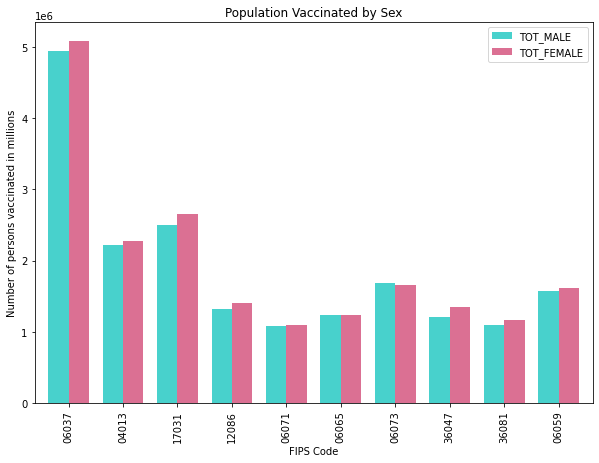

In [136]:
gender_graph= worst_gender.plot(kind='bar', width = 0.75, figsize=(10,7), color=['mediumturquoise', 'palevioletred'])
gender_graph
plt.title("Population Vaccinated by Sex")
plt.xlabel("FIPS Code")
plt.ylabel("Number of persons vaccinated in millions")

Text(0, 0.5, 'Number of persons vaccinated in millions')

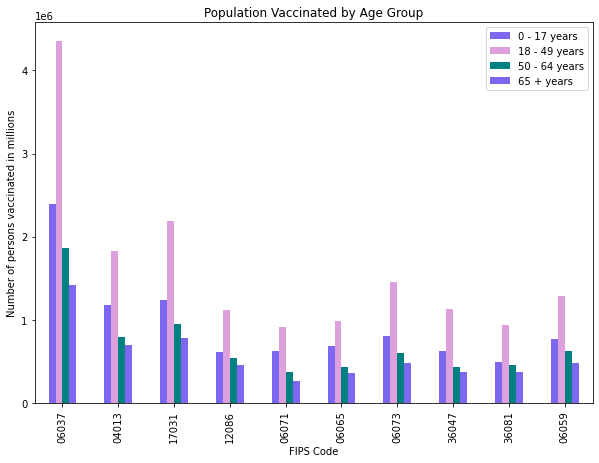

In [135]:
worst_agegroup.plot(kind='bar', figsize=(10,7), color=['mediumslateblue', 'plum', 'teal'])
plt.title("Population Vaccinated by Age Group")
plt.xlabel("FIPS Code")
plt.ylabel("Number of persons vaccinated in millions")

Text(0, 0.5, 'Number of persons vaccinated in millions')

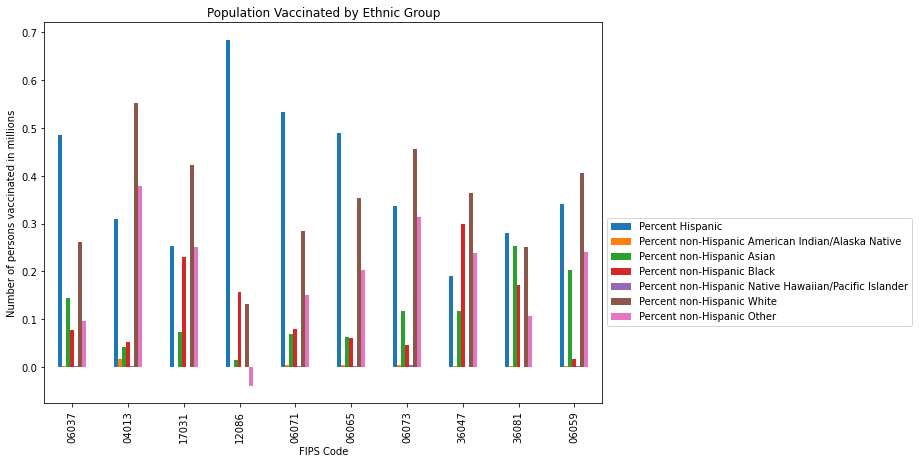

In [137]:
worst_ethnic.plot(kind='bar', figsize=(10,7), )
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5))
plt.title("Population Vaccinated by Ethnic Group")
plt.xlabel("FIPS Code")
plt.ylabel("Number of persons vaccinated in millions")

## Demographics regressions

### 1. Data loading and pre-processing

In [161]:
pers_vaccinated = vaccination[['Percent adults fully vaccinated against COVID-19', 'Percent Hispanic', 
                               'Percent non-Hispanic American Indian/Alaska Native', 'Percent non-Hispanic Asian', 
                               'Percent non-Hispanic Black', 'Percent non-Hispanic Native Hawaiian/Pacific Islander',
                               'Percent non-Hispanic White', 'Percent non-Hispanic Other']]

pers_vaccinated.replace(np.nan,0)

,Percent adults fully vaccinated against COVID-19,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Percent non-Hispanic Other
FIPS Code,,,,,,,,
1001,0.114,0.0283,0.0025,0.0103,0.1900,0.0001,0.7460,0.6548
1003,0.176,0.0456,0.0065,0.0092,0.0917,0.0000,0.8307,0.6710
1005,0.128,0.0436,0.0029,0.0048,0.4744,0.0000,0.4581,0.3463
1007,0.115,0.0257,0.0013,0.0012,0.2214,0.0000,0.7453,0.6354
1009,0.095,0.0926,0.0007,0.0037,0.0153,0.0004,0.8689,0.7923
...,...,...,...,...,...,...,...,...
56037,0.228,0.1588,0.0102,0.0074,0.0112,0.0003,0.7956,0.5841
56039,0.305,0.1503,0.0033,0.0125,0.0124,0.0012,0.8134,0.5153
56041,0.206,0.0913,0.0065,0.0016,0.0011,0.0000,0.8752,0.6935


### 2. Data visualization

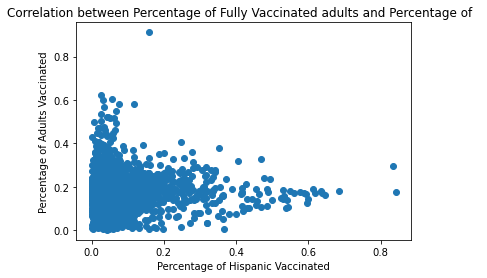

In [170]:
adults_vacc = pers_vaccinated['Percent adults fully vaccinated against COVID-19']
hisp_vacc= pers_vaccinated['Percent Hispanic']
plt.scatter(hisp_vacc, adults_vacc)
plt.title("Correlation between Percentage of Fully Vaccinated adults and Percentage of  ")
plt.ylabel("Percentage of Adults Vaccinated")
plt.xlabel("Percentage of Hispanic Vaccinated")
plt.show()

In [177]:
print(f"The correlation coefficient between the percentage of fully vaccinated adults and the percentage of hispanic vaccinated is {round(st.pearsonr(hisp_vacc, adults_vacc)[0],2)}")

ValueError: array must not contain infs or NaNs

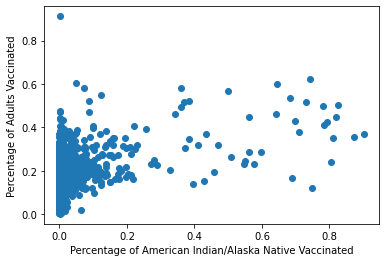

In [171]:
nat_vacc= pers_vaccinated['Percent non-Hispanic American Indian/Alaska Native']
plt.scatter(nat_vacc, adults_vacc)
plt.ylabel("Percentage of Adults Vaccinated")
plt.xlabel("Percentage of American Indian/Alaska Native Vaccinated")
plt.show()

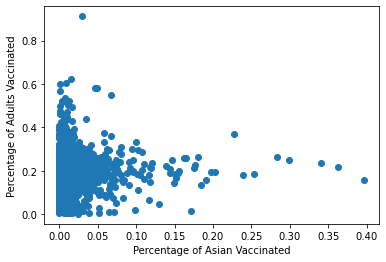

In [172]:
asian_vacc= pers_vaccinated['Percent non-Hispanic Asian']
plt.scatter( asian_vacc, adults_vacc)
plt.ylabel("Percentage of Adults Vaccinated")
plt.xlabel("Percentage of Asian Vaccinated")
plt.show()

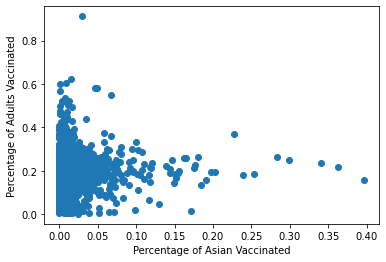

In [173]:
asian_vacc= pers_vaccinated['Percent non-Hispanic Asian']
plt.scatter(asian_vacc, adults_vacc)
plt.ylabel("Percentage of Adults Vaccinated")
plt.xlabel("Percentage of Asian Vaccinated")
plt.show()

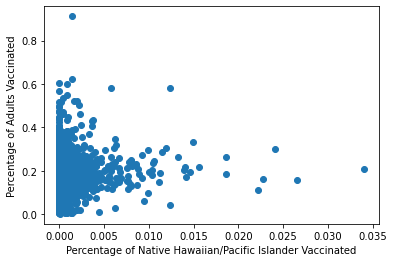

In [174]:
pacific_vacc= pers_vaccinated['Percent non-Hispanic Native Hawaiian/Pacific Islander']
plt.scatter(pacific_vacc, adults_vacc)
plt.ylabel("Percentage of Adults Vaccinated")
plt.xlabel("Percentage of Native Hawaiian/Pacific Islander Vaccinated")
plt.show()

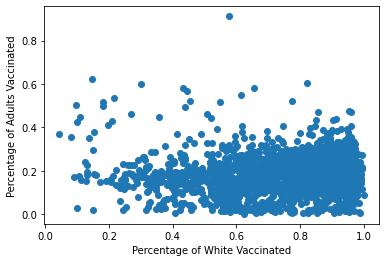

In [175]:
white_vacc= pers_vaccinated['Percent non-Hispanic White']
plt.scatter(white_vacc, adults_vacc)
plt.ylabel("Percentage of Adults Vaccinated")
plt.xlabel("Percentage of White Vaccinated")
plt.show()

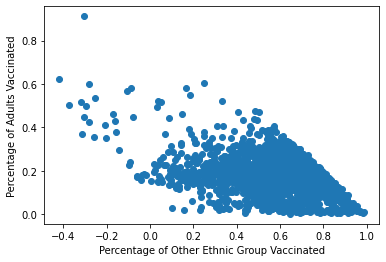

In [176]:
other_vacc= pers_vaccinated['Percent non-Hispanic Other']
plt.scatter(other_vacc, adults_vacc)
plt.ylabel("Percentage of Adults Vaccinated")
plt.xlabel("Percentage of Other Ethnic Group Vaccinated")
plt.show()